# `make_regression`을 이용한 PCA Regression

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

scikit-learn에서는 `make_regression` 함수를 이용하여 회귀분석을 연습하기 위한 데이터셋을 만들 수 있다. 이를 이용해서 Principal Component Regression을 연습하는 과제를 진행해보자.



# 패키지 불러오기

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression

# Q1 `make_regression` 함수로 데이터 생성해보자

독립변수는 X1부터 X10까지, 종속변수는 Y를 생성하자. 표본 크기는 1000으로 설정하고, `noise`, `random_state`, `bias`등의 변수는 자유롭게 설정해보자.

In [2]:
# make_regression로 데이터 생성
X, y = make_regression(n_samples=1000, n_features=10, bias=10, n_targets=1, noise=1, random_state=42)

# Q2 EDA를 해보자

각 변수별 히스토그램, scatterplot matrix, correlation matrix, 요약통계량(descriptive statistics)를 그려보자


In [3]:
y.reshape(-1,1).shape

(1000, 1)

In [4]:
data = np.concatenate([X,y.reshape(-1,1)], axis=1)
df = pd.DataFrame(data, columns=['X1', 'X2', 'X3','X4', 'X5', 'X6','X7', 'X8', 'X9','X10', 'y'])
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-52.604706
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,117.537952
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-104.845161
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,47.578671
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,142.104552


array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>,
        <Axes: title={'center': 'X3'}>],
       [<Axes: title={'center': 'X4'}>, <Axes: title={'center': 'X5'}>,
        <Axes: title={'center': 'X6'}>],
       [<Axes: title={'center': 'X7'}>, <Axes: title={'center': 'X8'}>,
        <Axes: title={'center': 'X9'}>],
       [<Axes: title={'center': 'X10'}>, <Axes: title={'center': 'y'}>,
        <Axes: >]], dtype=object)

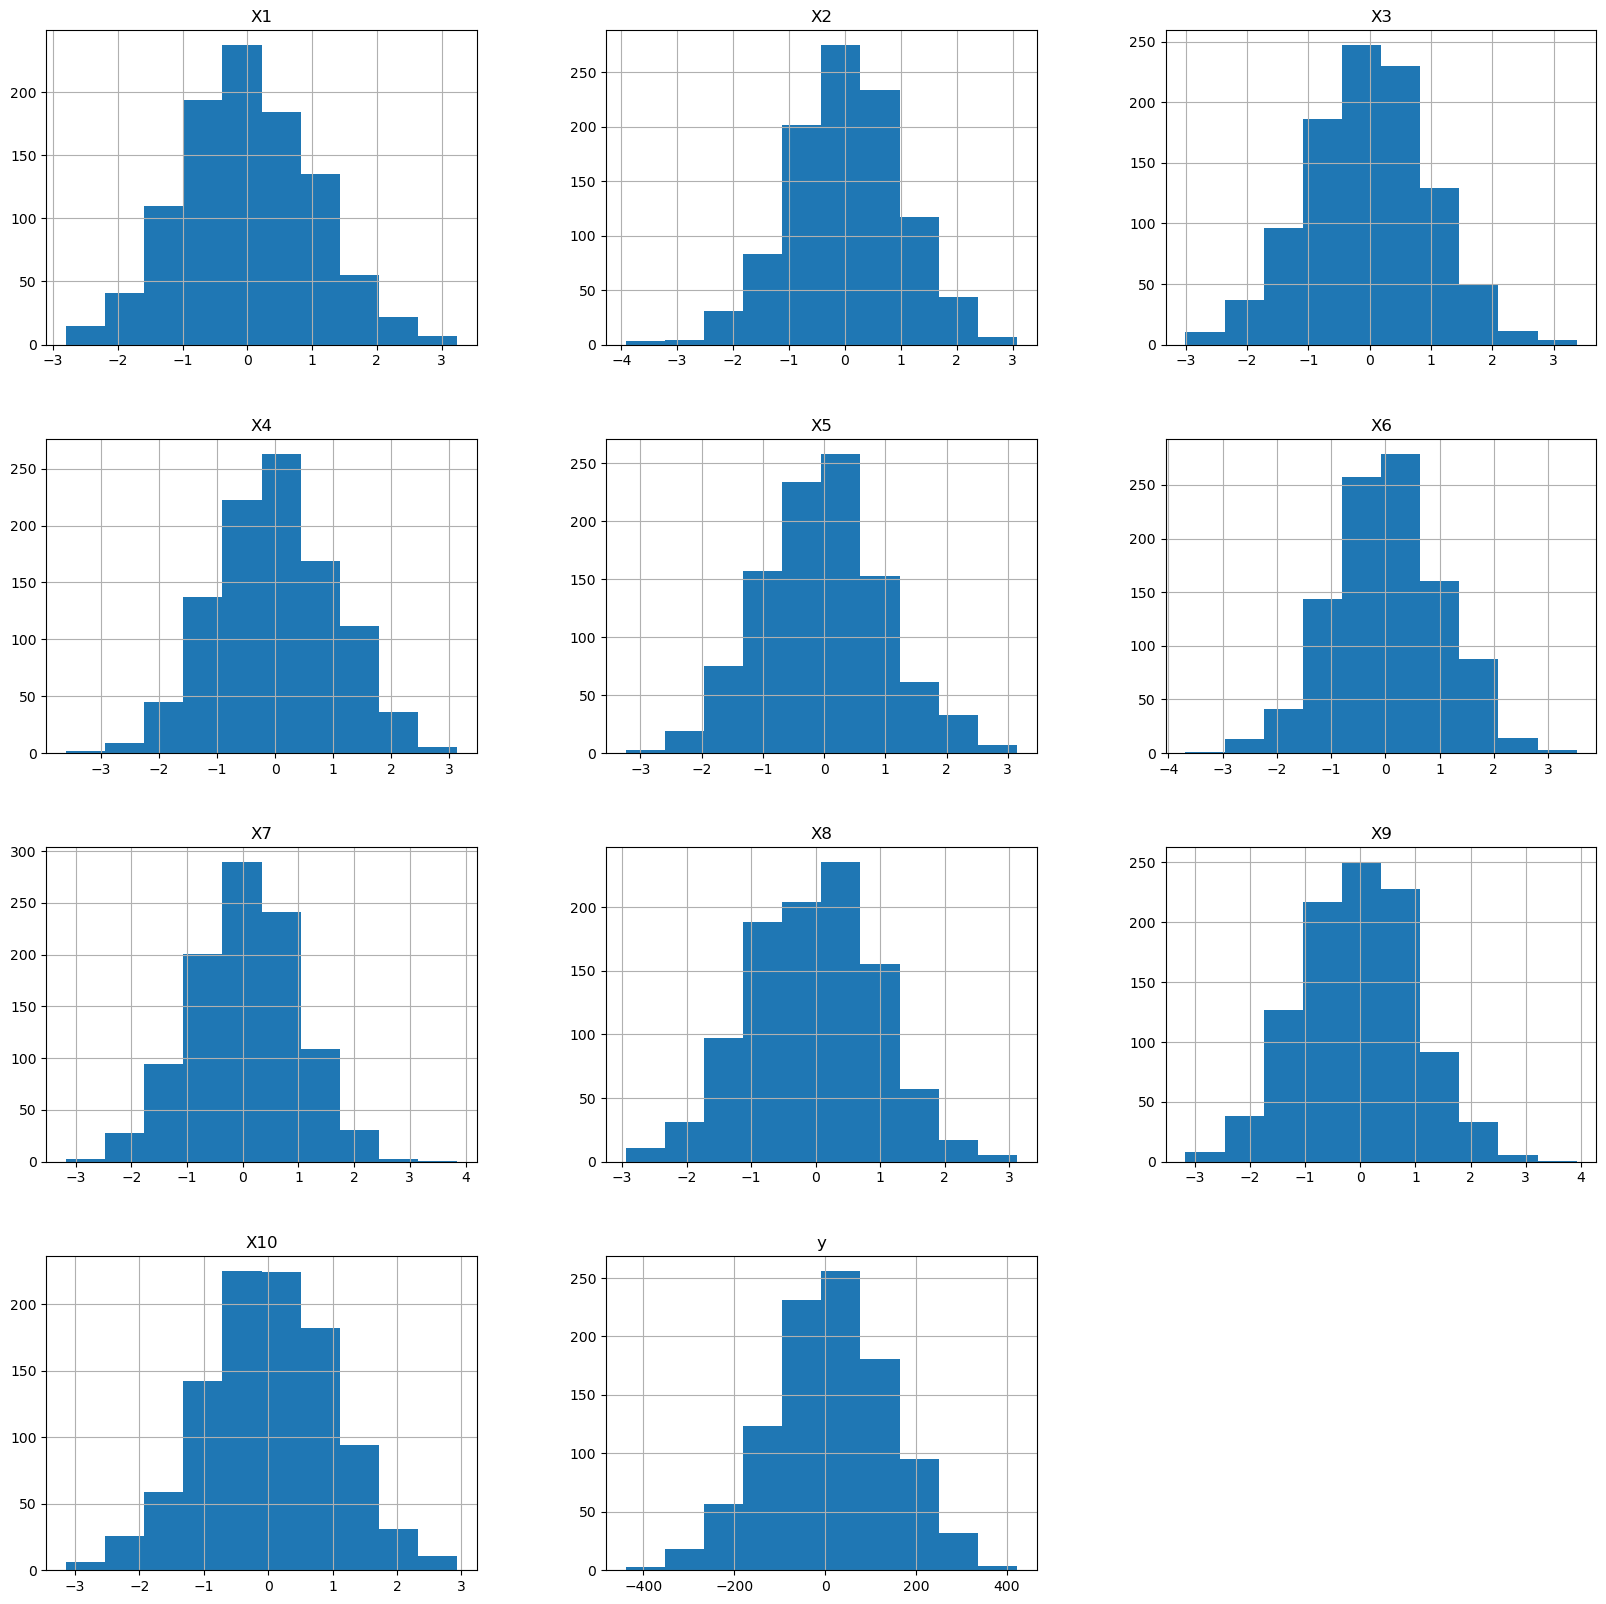

In [5]:
# 히스토그램
df.hist(figsize=(20,20))

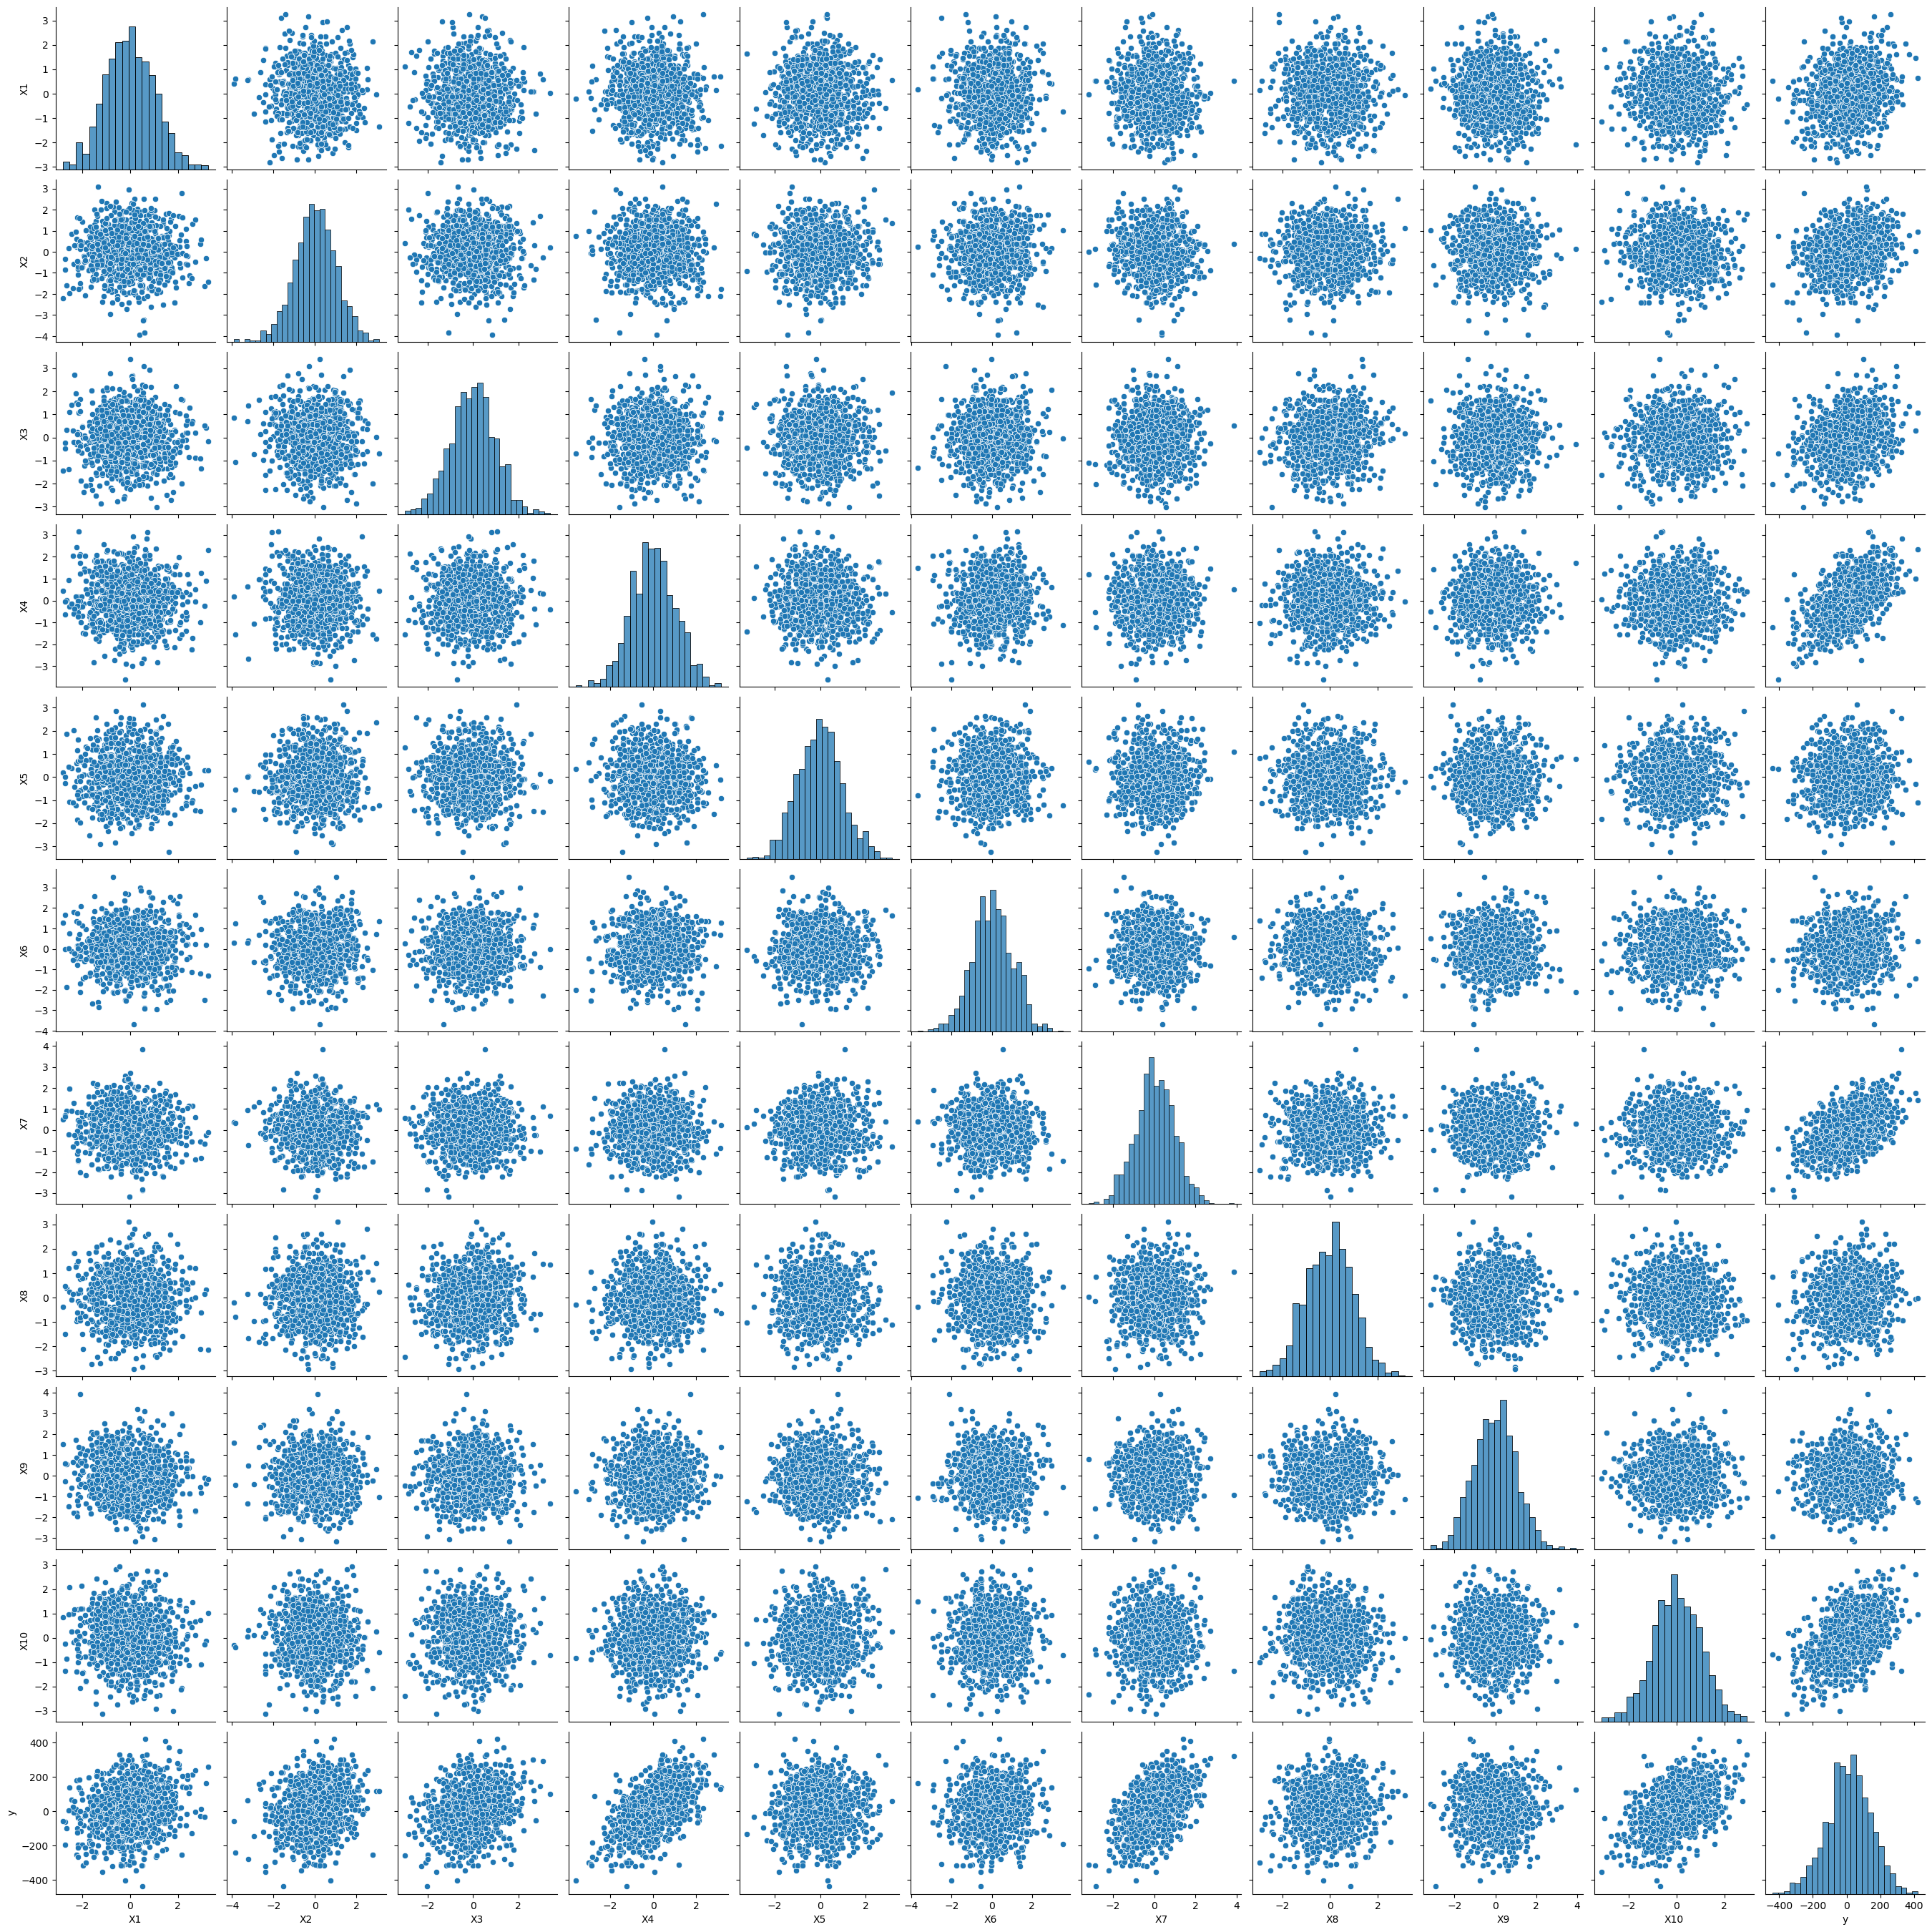

In [6]:
# Scatterplot matrix

import seaborn as sns
sns.pairplot(df, diag_kind='hist')

<Axes: >

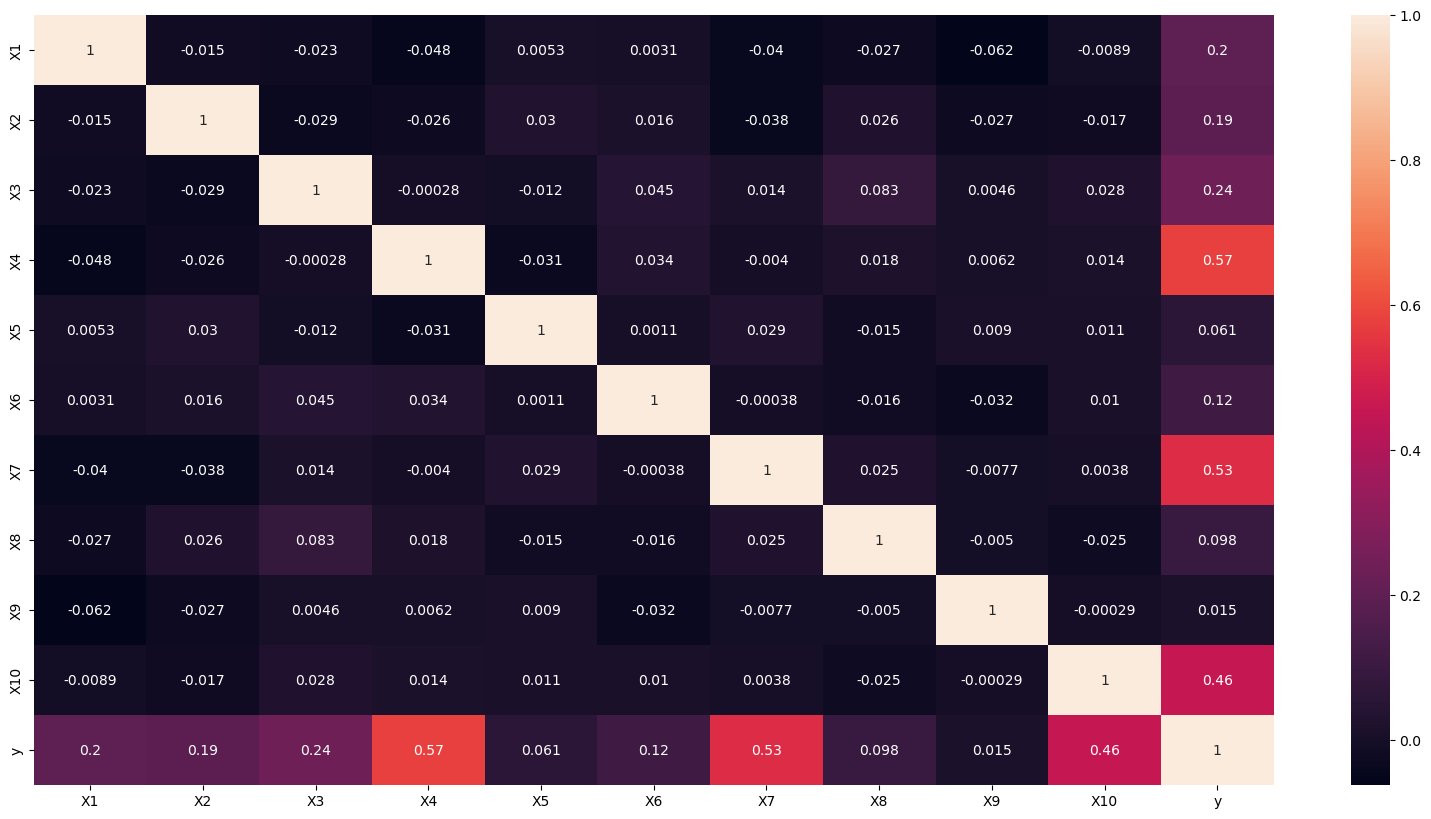

In [8]:
# Correlation matrix
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 10))
corr = df.corr()
sns.heatmap(corr, annot = True)

In [9]:
# 요약 통계량
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.002689,0.010788,-0.023104,0.005495,-0.022542,0.031292,0.038105,-0.043075,-0.029252,0.013622,13.257344
std,1.031230,1.005433,0.986846,1.030962,0.983366,1.016046,0.945284,0.983406,1.037024,1.012645,132.300006
min,-2.801912,-3.922400,-3.007632,-3.601085,-3.241267,-3.688365,-3.176704,-2.943142,-3.170426,-3.138515,-438.927822
25%,-0.744779,-0.616527,-0.650034,-0.713176,-0.702626,-0.631506,-0.559290,-0.750008,-0.749592,-0.651541,-69.431911
50%,-0.024976,0.014006,-0.003221,-0.013284,-0.015036,0.007605,0.019097,-0.001346,-0.012086,-0.012020,15.976521
75%,0.683319,0.679698,0.608861,0.696602,0.613766,0.685621,0.687027,0.638310,0.680087,0.721896,102.431911
max,3.243093,3.076860,3.377383,3.137749,3.152057,3.529055,3.852731,3.117681,3.926238,2.935658,421.854678


# Q3 `StandardScaler` 로 scaling을 해보자

X 변수들에 대해 `StandarScaler`를 이용하여 표준화를 해보자.
PCA를 하기 전에 스케일링을 한다는 점을 유의하자.

In [11]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,y
0,1.575876,0.891863,-0.726774,-0.047799,-0.657035,-1.113295,-0.877617,0.994558,-0.299696,-0.761760,-52.604706
1,0.535459,1.266661,-1.779875,1.209010,-0.113158,-0.971062,1.064171,-0.555273,0.741320,-0.987523,117.537952
2,-0.686279,0.157128,0.145836,-1.432671,-0.666849,0.176190,0.585299,0.197917,-0.404362,-0.607472,-104.845161
3,0.925282,0.395914,0.676357,0.168651,1.574147,-0.117172,-0.037687,-0.345907,0.895796,-0.837381,47.578671
4,-0.558922,1.073632,1.565524,0.377212,0.132970,-1.026515,-0.065750,-0.700121,-1.523187,1.195047,142.104552


In [13]:
from sklearn.preprocessing import StandardScaler

# 스케일링하기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(X_scaled)

,0,1,2,3,4,5,6,7,8,9
0,1.531525,0.876753,-0.713406,-0.051720,-0.645549,-1.127075,-0.969212,1.055670,-0.260919,-0.766083
1,0.522111,1.249713,-1.781078,1.167955,-0.092196,-0.987018,1.086001,-0.521101,0.743433,-0.989138
2,-0.663220,0.145622,0.171278,-1.395674,-0.655534,0.142681,0.579158,0.245181,-0.361899,-0.613645
3,0.900318,0.383237,0.709138,0.158335,1.624510,-0.146193,-0.080219,-0.308096,0.892468,-0.840796
4,-0.539658,1.057630,1.610608,0.360733,0.158221,-1.041623,-0.109921,-0.668467,-1.441319,1.167256
...,...,...,...,...,...,...,...,...,...,...
995,-0.188849,-0.065359,-0.174182,-0.152137,0.553137,0.250371,1.159666,0.700255,0.114647,0.535483
996,-0.955819,1.578827,0.110120,0.696342,-0.643244,0.604012,-1.856258,-0.475660,0.337849,0.065499
997,0.417818,-0.840244,1.685360,1.666830,-0.786905,-0.700300,-2.075416,0.239049,-0.507507,-0.172092
998,-0.262964,-1.384561,0.175091,-0.019182,-0.239175,-0.460296,0.063211,-0.027020,-0.631335,0.667441


# Q4 `PCA`를 해보자

`PCA` 함수를 이용하여 PCA를 해보자. 또 다음을 해보자.

- PC1 부터 PC10 까지 Scree plot을 그려보자
- PC1과 PC2를 가지고 scatterplot을 그려보자.

In [19]:
from sklearn.decomposition import PCA

# PCA 계산하기
pca = PCA(n_components=10)
data_pca = pca.fit_transform(X_scaled)

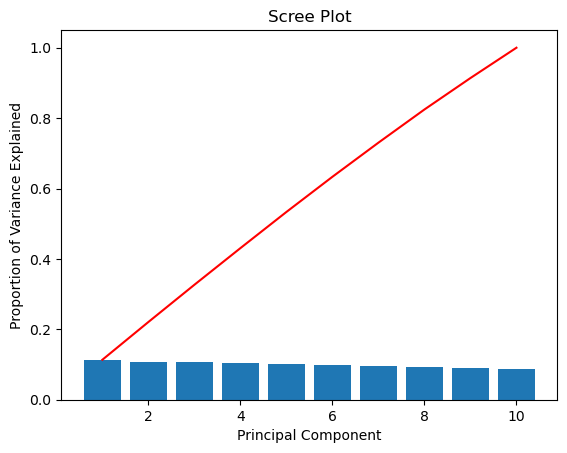

In [15]:
# Scree plot 그리기
PC_values = np.arange(pca.n_components_) + 1
plt.bar(PC_values, pca.explained_variance_ratio_)
plt.plot(PC_values, np.cumsum(pca.explained_variance_ratio_),c='red',label='Cumulative Explained Variance')

plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [23]:
data_pca.shape

(1000, 10)

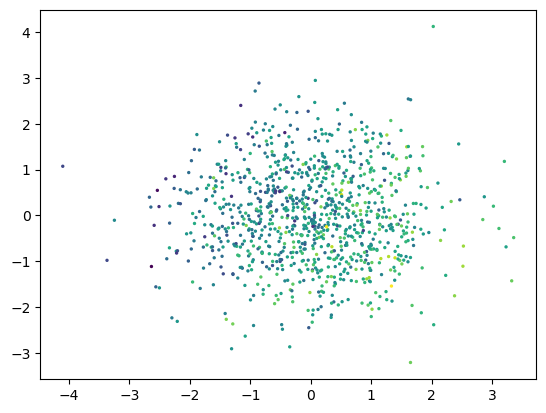

In [24]:
# PC1 와 P2 산점도 그리기
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y, s=2)

# Q5 `train_test_split`을 해보자

Train set과 Test set을 6:4 비율로 나눠보자

In [42]:
from sklearn.model_selection import train_test_split

# train set과 test set 나누기
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.4)

In [53]:
X_train[:,:2].shape

(600, 2)

#  Q6 Principal Component Regression을 진행해보자.

Q5에서 만든 데이터로부터 다음의 과정으로 문제를 풀어보자.
- Y를 종속변수(`y_train`), `X_train`의 PC1을 종속(독립?)변수로 하여 Linear Regression을 적합한다.
- `y_pred`과 `y_train`을 비교하여 train error의 MSE를 구한다.
- Principal component을 하나 늘려 Linear regression을 적합한다. 즉 Y에 대해 PC1, PC2으로 Linear Regression을 적합한다.
- 마찬가지로 train error의 MSE를 구한다.
- PC10까지 같은 과정을 반복하고, MSE를 비교한다.



In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# train MSE 저장
mse_train = []

# 회귀모형 적합
for i in range(10):
    lr = LinearRegression()
    lr.fit(X_train[:,:i+1], y_train.reshape(-1,1))
    y_pred = lr.predict(X_train[:,:i+1])
    mse_train.append(mean_squared_error(y_train, y_pred))

[14899.249716433776, 14266.116422333298, 13577.137400205485, 11781.173536237971, 10887.682796139867, 10347.796824802406, 8570.289074168926, 7533.440253581234, 3454.434535921217, 0.8744531116289863]


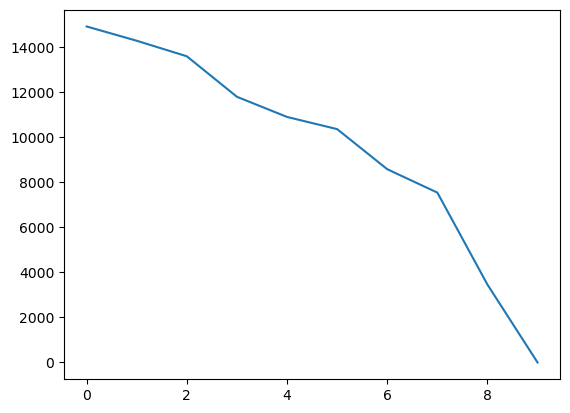

In [60]:
print(mse_train)
plt.plot(mse_train)

# Q7 Test error을 계산해보자.

위 과정에서 적합한 모형을 바탕으로 `y_test`을 추정하고 `y_test`와의 MSE를 계산하여 test error을 구해보자.

[14085.52157106366, 13858.615159241264, 13394.605825017616, 10640.084262153094, 9964.946963089837, 9563.899767325865, 7216.151026862565, 6235.64597182797, 3318.657969966521, 1.0394881275692547]


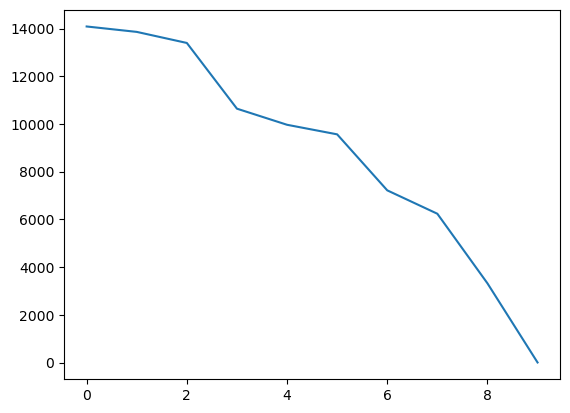

In [61]:
# test MSE 저장
mse_test = []

for i in range(10):
    lr = LinearRegression()
    lr.fit(X_train[:,:i+1], y_train.reshape(-1,1))
    y_pred = lr.predict(X_test[:,:i+1])
    mse_test.append(mean_squared_error(y_test, y_pred))

print(mse_test)
plt.plot(mse_test)